### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Mirasha Perera

# 1.0 Data Validation


## 1.1 Load and explore the data

In [193]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import math


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import nltk 
import os 

# Install the required tokenisation model.
nltk.download('punkt')

# Normalisation
# Remvoing stepwords
nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

# Measure frequency distributions in a tokenised data set
from nltk.probability import FreqDist


# Stemming the data
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')

# Lemmatise the data
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')

# Remove punctuation
import re

nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/mirasha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirasha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mirasha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mirasha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mirasha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [194]:
# Function to Validate data.
def validate_data(df):
    """ 
    This function returns the data types,meta data and duplicates
    """  
    # Check Data Types.
    data_types=df.dtypes
    print("Data Types:")
    print(data_types)
    
    # View Metadata.
    print("\nreview metadata:")
    data_info = df.info()
    
    # Duplicate check.
    duplicates= df.duplicated().sum()
    print("\nNumber of duplicates:")
    print(duplicates)
    
    return data_types, data_info, duplicates

In [195]:
# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Set the palette globally for Seaborn
sns.set_palette(custom_palette)

In [196]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [197]:
validate_data(reviews)

Data Types:
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

review metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object

(gender                     object
 age                         int64
 remuneration (k£)         float64
 spending_score (1-100)      int64
 loyalty_points              int64
 education                  object
 language                   object
 platform                   object
 product                     int64
 review                     object
 summary                    object
 dtype: object,
 None,
 0)

In [198]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [199]:
# Basic descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 1.2 Drop Columns

In [200]:
# Drop unnecessary columns.
reviews.drop(columns=['language','platform'],inplace=True)

# View column names.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 1.3. Rename columns

In [201]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)':'remuneration',
                                 'spending_score (1-100)':'spending_score'})

# View column names.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 1.4. Save the DataFrame as a CSV file

In [202]:
# Create a CSV file as output.
reviews.to_csv('reviews_cleaned',index=False)

In [203]:
# Import new CSV file with Pandas.
reviews_cleaned = pd.read_csv('reviews_cleaned')

# View DataFrame.
print(reviews_cleaned.shape)
print(reviews_cleaned.info())
reviews_cleaned.head()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 2.0 Analyzing Factors Influencing Loyalty Points

The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

### 2.1 Spending vs Loyalty

In [204]:
# Define independent variable.
x = reviews_cleaned['spending_score'].values.reshape(-1,1)

# Define dependent variable.
y = reviews_cleaned['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.
f1 = 'y ~ x'

test1 = ols(f1,data=reviews_cleaned).fit()
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          2.92e-263
Time:                        12:09:42   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
# Extract the estimated parameters.
print("\nEstimated parameters",test1.params) 

# Extract the standard errors.
print("\nStandard errors",test1.bse)  

# Extract the predicted values.
print("\nPredicted values",test1.predict())


Estimated parameters Intercept   -75.052663
x            33.061693
dtype: float64

Standard errors Intercept    45.930554
x             0.814419
dtype: float64

Predicted values [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [206]:
# Set the X coefficient and the constant to generate the regression table.
y_pred1 = 75.052663+33.061693*reviews_cleaned['spending_score']

# View the output.
y_pred1

0       1364.458690
1       2753.049796
2        273.422821
3       2620.803024
4       1397.520383
           ...     
1995    2356.309480
1996     339.546207
1997    3083.666726
1998     604.039751
1999     339.546207
Name: spending_score, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Spending Score vs Loyalty Points')

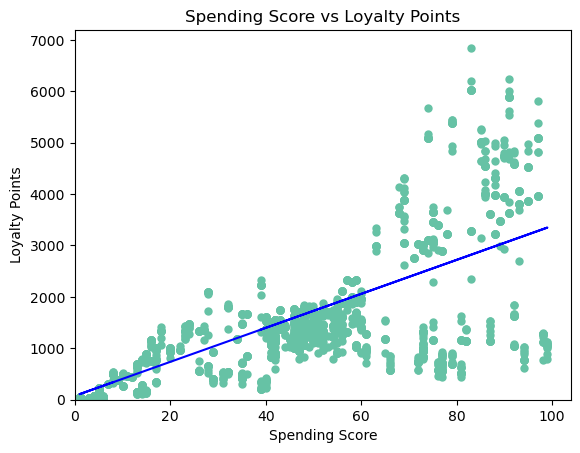

In [207]:
# Plot the graph with a regression line.
plt.scatter(x,y,linewidth=0.01)

# Plot the regression line (in black)
plt.plot(x,y_pred1,color = 'b')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Spending Score vs Loyalty Points')

### Check for multicolinearity

> - Customers with higher spending scores accumulate more loyalty points. 


### 2.2 Renumeration vs loyalty

In [208]:
# Define independent variable.
x2 = reviews_cleaned['remuneration'].values.reshape(-1,1)

# Define dependent variable.
y2 = reviews_cleaned['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.
f2 = 'y2 ~ x2'

test2 = ols(f2,data=reviews_cleaned).fit()

test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):          2.43e-209
Time:                        12:09:44   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
# Extract the estimated parameters.
print("\nEstimated parameters",test2.params)

# Extract the standard errors.
print("\nStandard errors",test2.bse)

# Extract the predicted values.
print("\nPredicted values",test2.predict())


Estimated parameters Intercept   -65.686513
x2           34.187825
dtype: float64

Standard errors Intercept    52.170717
x2            0.977925
dtype: float64

Predicted values [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [210]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred2 = -65.686513+34.187825*reviews_cleaned['remuneration']

# View the output.
y_pred2

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Remuneration vs Loyalty Points')

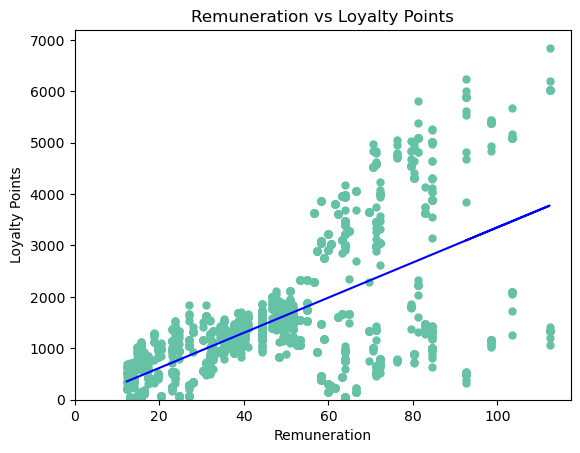

In [211]:
# Plot the graph
plt.scatter(x2,y2,linewidth=0.01)

# Plot the regression line (in black)
plt.plot(x2,y_pred2,color = 'b')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration vs Loyalty Points')

> - Customers with high income tend to accumulate more loyalty points.

### 2.3 Age vs loyalty

In [212]:
# Define independent variable.
x3 = reviews_cleaned['age'].values.reshape(-1,1)

# Define dependent variable.
y3 = reviews_cleaned['loyalty_points'].values.reshape(-1,1)

# Create model and print summary of metrics.

f3 = 'y3 ~ x3'
test3 = ols(f3,data=reviews_cleaned).fit()

test3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 18 Jul 2024   Prob (F-statistic):             0.0577
Time:                        12:09:45   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
# Extract the estimated parameters.
print("\nEstimated parameters:",test3.params)
# Extract the standard errors.
print("\nStandard errors:",test3.bse)

# Extract the predicted values.
print("\nPredicted values:",test3.predict())


Estimated parameters: Intercept    1736.517739
x3             -4.012805
dtype: float64

Standard errors: Intercept    88.248731
x3            2.113177
dtype: float64

Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [214]:
# Set the X coefficient and the constant to generate the regression table.
y_pred3 = 1736.517739-4.012805*reviews_cleaned['age']

# View the output.
y_pred3

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Age vs Loyalty Points')

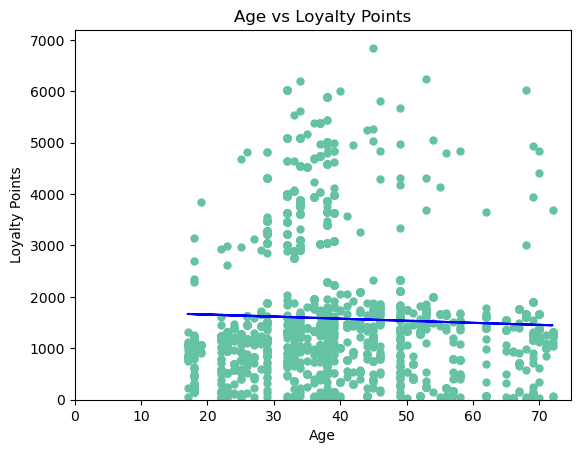

In [215]:
# Plot the graph
plt.scatter(x3,y3,linewidth=0.01)

# Plot the regression line (in black)
plt.plot(x3,y_pred3,color = 'b')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Age vs Loyalty Points')

> - Old customers tend to have fewer loyalty points compared to younger customers.

## 2.0 Exploring the structure using decision trees.

## 1. Load and prepare the data

In [216]:
# Create your new DataFrame.
df2 = pd.read_csv('reviews_cleaned')
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [217]:
df2.dtypes

gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object

In [218]:
# Create dummy Variables:
# Name new DataFrame and convert categorical variables to dummy variables.
cat_vars = ['gender','education']

# Specify what needs to apply to all the variables.

for var in cat_vars:
    cat_list = pd.get_dummies(df2[var],prefix=var)
    # Indicate the joining of the DataFrames
    df2 = df2.join(cat_list)
    
# Drop gender and education to avoid multicolinearity.
df_fin = df2.drop(cat_vars, axis=1)

# Set a temp dataframe
df_vars = df2.columns.values.tolist()

# Indicate what columns are kept.
to_keep = [i for i in df_vars if i not in cat_vars]

# Define new DataFrame.
df_fin = df2[to_keep]  

# Print the column.
df_fin.columns.values 


array(['age', 'remuneration', 'spending_score', 'loyalty_points',
       'product', 'review', 'summary', 'gender_Female', 'gender_Male',
       'education_Basic', 'education_PhD', 'education_diploma',
       'education_graduate', 'education_postgraduate'], dtype=object)

In [219]:
df_fin.drop(columns=['review','summary'],inplace=True)

In [220]:
# Specify Y.
y = df_fin['loyalty_points']

# Specify X.
X = df_fin.drop(columns='loyalty_points')

In [221]:
# Review X and Y.
X.head()

,age,remuneration,spending_score,product,gender_Female,gender_Male,education_Basic,education_PhD,education_diploma,education_graduate,education_postgraduate
0,18,12.30,39,453,False,True,False,False,False,True,False
1,23,12.30,81,466,False,True,False,False,False,True,False
2,22,13.12,6,254,True,False,False,False,False,True,False
3,25,13.12,77,263,True,False,False,False,False,True,False
4,33,13.94,40,291,True,False,False,False,False,True,False


## 2. Create train and test data sets.

In [222]:
# Split the data into test and train data.
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                random_state=42,
                                                train_size = 0.3)

In [223]:
feature_cols = [x for x in X.columns]
feature_cols

['age',
 'remuneration',
 'spending_score',
 'product',
 'gender_Female',
 'gender_Male',
 'education_Basic',
 'education_PhD',
 'education_diploma',
 'education_graduate',
 'education_postgraduate']

## 3. Create Decision tree regressor

In [224]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state =42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [225]:
# Evaluate the model:
# Predict the response for the data test.
y_pred = regressor.predict(X_test)

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error:" ,math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 50.05642857142857
Mean Squared Error: 14307.165
Root Mean Squared Error: 119.61256204930986


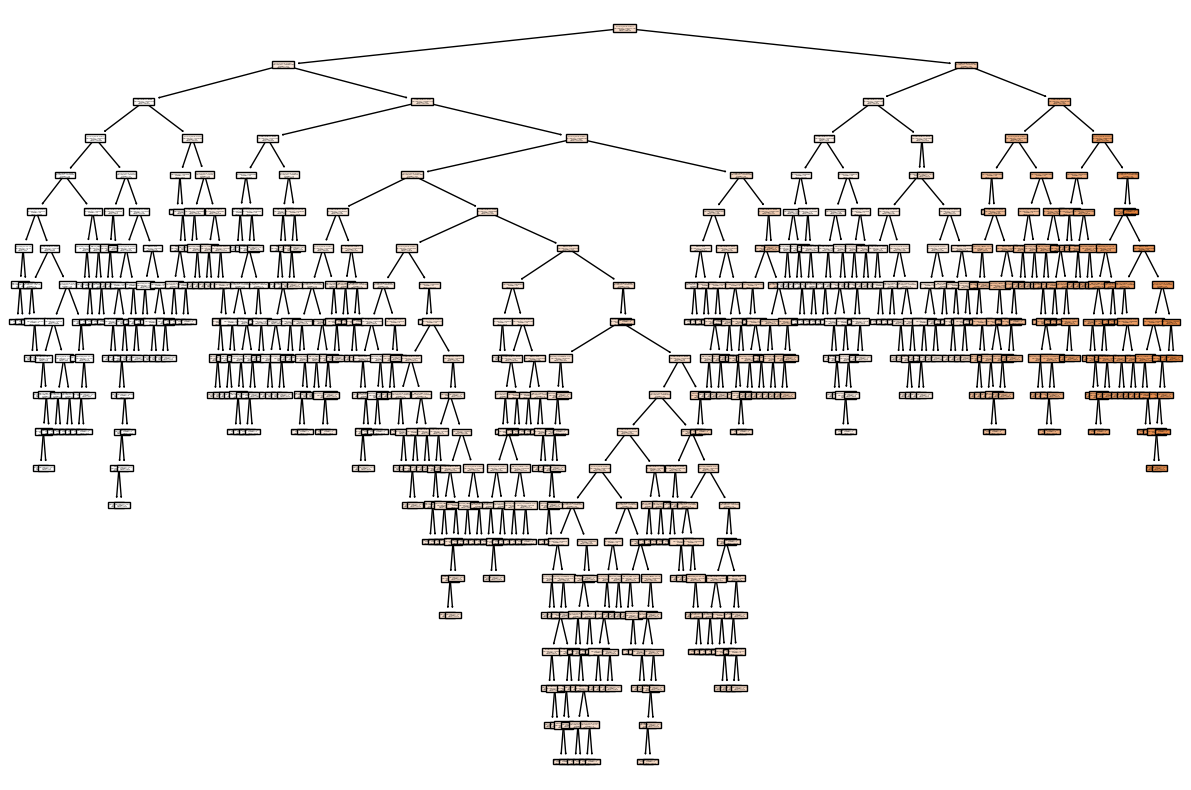

In [226]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=feature_cols, filled=True)
plt.show()

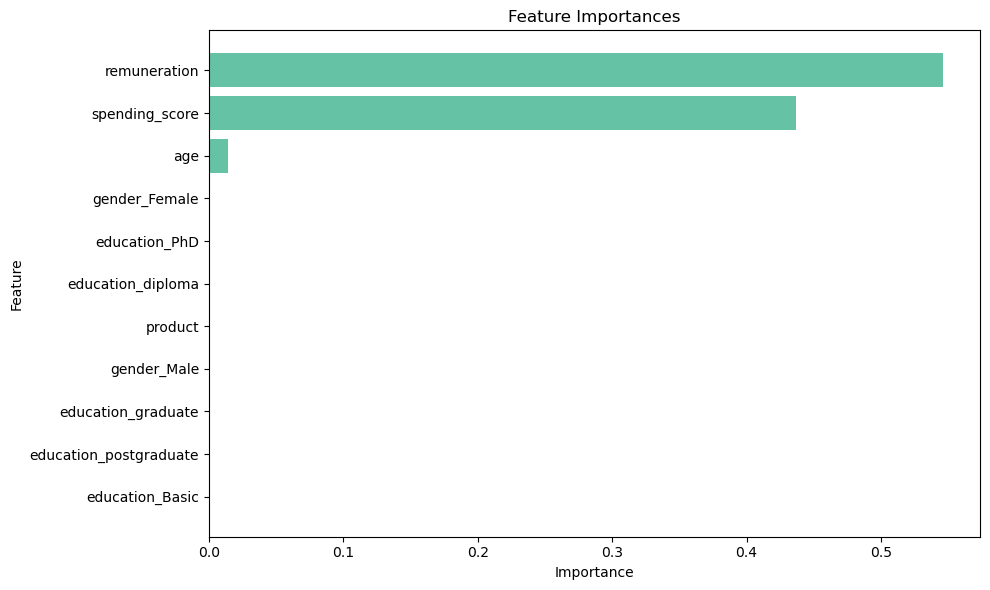

In [227]:
#Extract feature importances
feature_imp = regressor.feature_importances_

#Create a DataFrame to display feature importances
feature_imp_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_imp})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=True)

#Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()



In [228]:
# Prune the model.

# Create and fit the decision tree regressor
regressor2 = DecisionTreeRegressor(max_depth=3, random_state=42)

regressor2.fit(X_train, y_train)

#Predict test data
y_pred_pruned = regressor2.predict(X_test)

#Evaluate the pruned model
print(f"Pruned Model MSE: {metrics.mean_squared_error(y_test, y_pred_pruned)}")
print(f"Pruned Model MAE: {metrics.mean_absolute_error(y_test, y_pred_pruned)}")
print(f"Pruned Model R-squared: {metrics.r2_score(y_test, y_pred_pruned)}")
print(f"Root Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_pruned, squared=False)}")

Pruned Model MSE: 152730.71138771088
Pruned Model MAE: 276.6730102337505
Pruned Model R-squared: 0.9073062741107425
Root Mean Squared Error: 390.807767819053


## 4. Fit and plot final model.

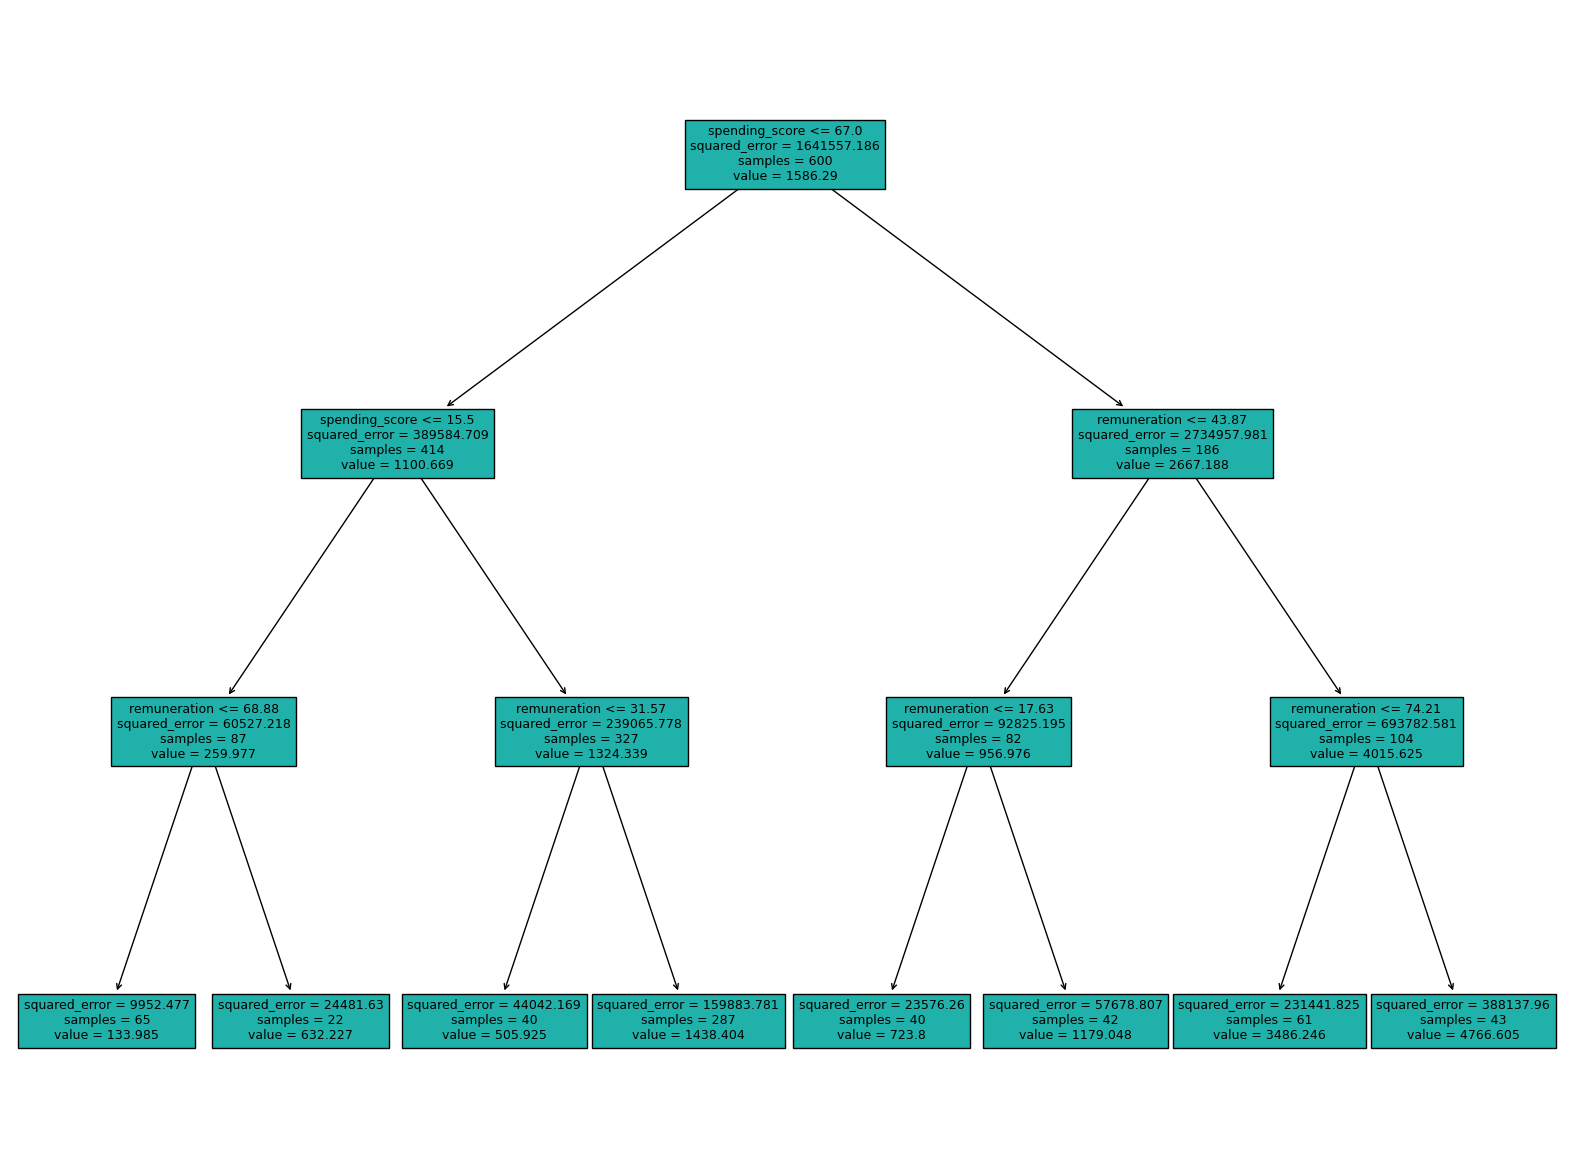

In [229]:
# Fit and plot final model.
# Visualize the decision tree
plt.figure(figsize=(20, 15))
plot_tree(regressor2, feature_names=feature_cols, filled=True)

# Accessing the elements of the plot to customize further
ax = plt.gca()  # Get the current axis
for item in ax.get_children():
    if isinstance(item, plt.Text):
        item.set_fontsize(9)
        item.set_bbox(dict(facecolor='LightSeaGreen', edgecolor='black'))

plt.show()


## 5. Discuss: Insights and observations



Feature importance analysis identified Remuneration as pivotal, indicating higher income leads to more loyalty points. Spending Score also showed strong correlation with loyalty points. A pruned decision tree (max depth 3) simplified the model, revealing key decision points and reinforcing the influence of income and spending score on loyalty points, whereas Age had minimal impact.


## 3.0 Segmenting Customer Behavior: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores.

## 1. Load and explore the data

In [231]:
# Create a new DataFrame containing the renumeration, spending_score and gender columns.
df3 = df2[['remuneration','spending_score','gender']]

# View DataFrame.
df3.head()# Explore the data.

,remuneration,spending_score,gender
0,12.30,39,Male
1,12.30,81,Male
2,13.12,6,Female
3,13.12,77,Female
4,13.94,40,Female


In [232]:
## 2. Plot# Explore the data.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   gender          2000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [233]:
# Descriptive statistics.
df3.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

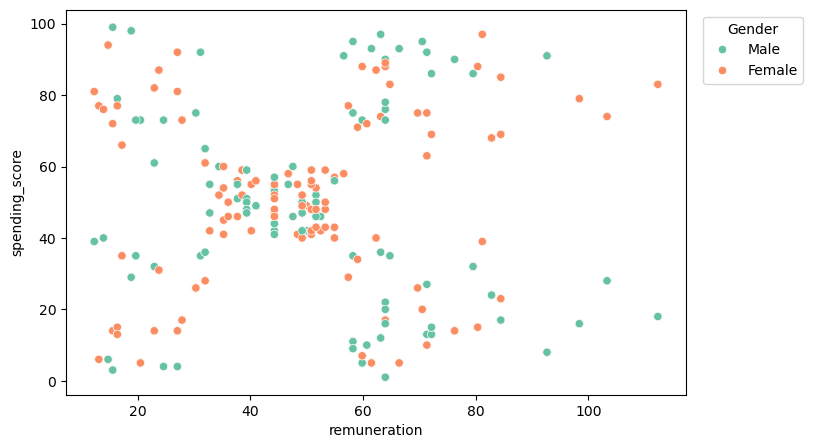

In [234]:
# Create a scatterplot with Seaborn.
plt.figure(figsize=(8, 5))
sns.scatterplot(data = df3,
                x='remuneration',y='spending_score',
               hue = 'gender' )
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1),title='Gender')

> - Suggests 5 clusters

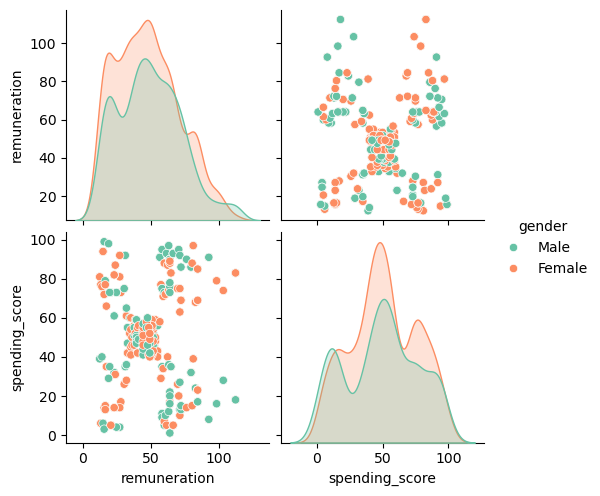

In [235]:
# Create a pairplot with Seaborn.
x = df3[['remuneration', 'spending_score']]

sns.pairplot(df3,
             vars=x,
             hue='gender',
             diag_kind='kde')

> - high income earning Female customers seems to be having a higher spending habbits than male high income earners

## 3. Elbow and silhoutte methods

Text(0, 0.5, 'SS distance')

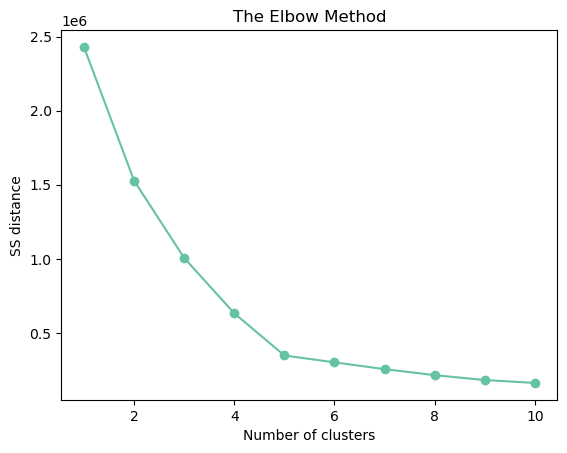

In [236]:
# Determine the number of clusters: Elbow method.

ss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,
                   init = 'k-means++',
                   max_iter=300,
                   n_init = 10,
                   random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)
    

# Plot the elbow chart
plt.plot(range(1,11),
         ss,
        marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

Text(0, 0.5, 'Sil')

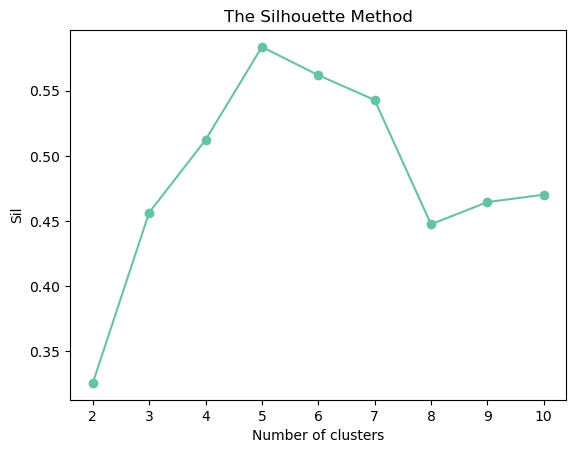

In [237]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2,kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                               metric = 'euclidean'))
    
    
# Plot the silhouette score
plt.plot(range(2,kmax+1),
         sil,
        marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")


> - Both methods suggest k=5.

## 4. Evaluate k-means model at different values of *k*

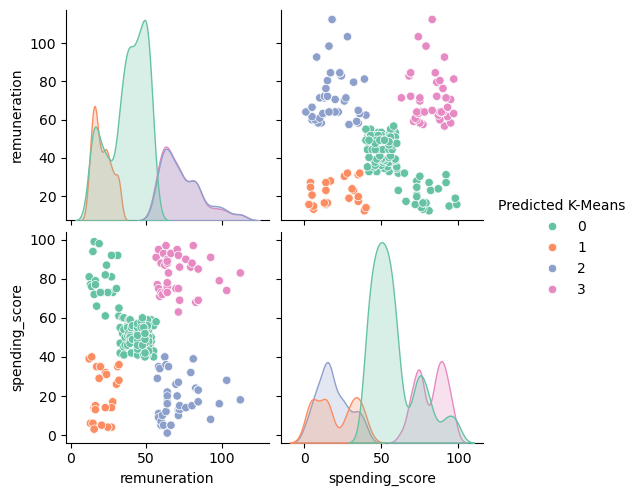

In [238]:
# Use 4 clusters
kmeans = KMeans(n_clusters=4,
               max_iter = 15000,
               init = 'k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_

# add predicted k_means to the df.
x['Predicted K-Means'] = clusters
# Plot in a pairplot

sns.pairplot(x,
            hue = 'Predicted K-Means',
            diag_kind = 'kde',
            palette=custom_palette)

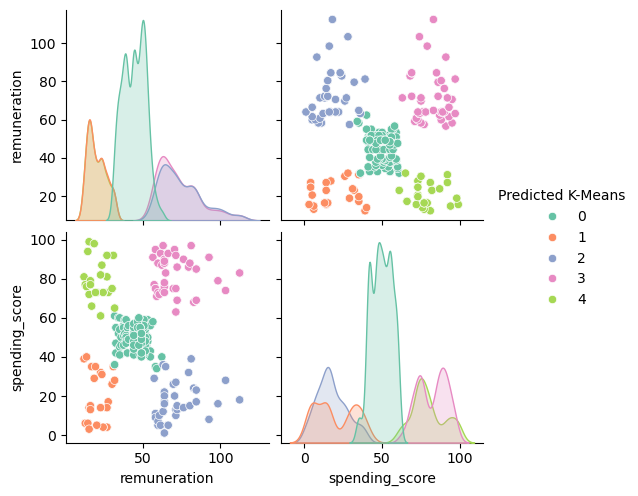

In [239]:
# Use 5 clusters
kmeans = KMeans(n_clusters=5,
               max_iter = 15000,
               init = 'k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_

# add predicted k_means to the df.
x['Predicted K-Means'] = clusters
# Plot in a pairplot

sns.pairplot(x,
            hue = 'Predicted K-Means',
            diag_kind = 'kde',
            palette=custom_palette)

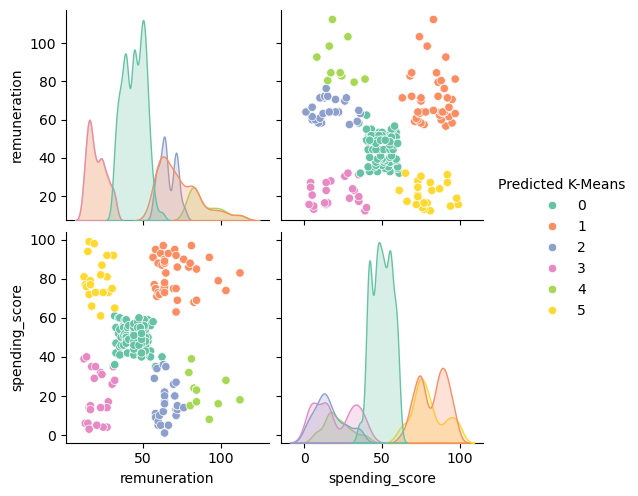

In [240]:
# Use 6 clusters
kmeans = KMeans(n_clusters=6,
               max_iter = 15000,
               init = 'k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_

# add predicted k_means to the df.
x['Predicted K-Means'] = clusters
# Plot in a pairplot

sns.pairplot(x,
            hue = 'Predicted K-Means',
            diag_kind = 'kde',
            palette=custom_palette)

## 5. Fit final model and justify your choice
>#### k=5 was chosen as suggested by the elbow and silhouette method

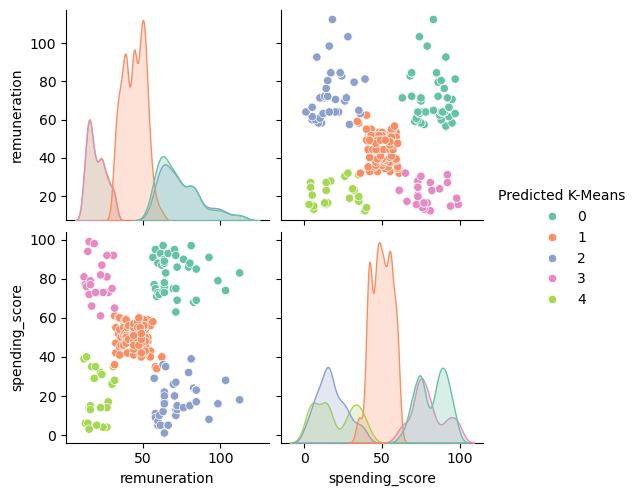

In [241]:
# Apply the final model.
kmeans = KMeans(n_clusters=5,
               max_iter = 15000,
               init = 'k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_

# add predicted k_means to the df.
x['Predicted K-Means'] = clusters
# Plot in a pairplot

sns.pairplot(x,
            hue = 'Predicted K-Means',
            diag_kind = 'kde',
            palette=custom_palette)

In [242]:
# Check the number of observations per predicted class.
x['Predicted K-Means'].value_counts()

Predicted K-Means
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

## 6. Plot and interpret the clusters

In [243]:
# View the DataFrame.
x.head()

,remuneration,spending_score,Predicted K-Means
0,12.30,39,4
1,12.30,81,3
2,13.12,6,4
3,13.12,77,3
4,13.94,40,4


Text(0, 0.5, 'Spending Score')

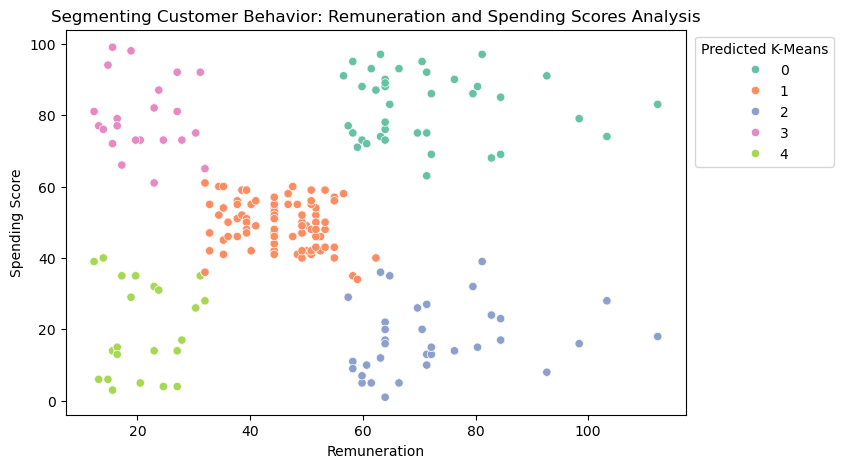

In [244]:
# Visualising the clusters.
plt.figure(figsize=(8, 5))
sns.scatterplot(data = x,
                x='remuneration',y='spending_score',
               hue = 'Predicted K-Means',palette=custom_palette )
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1),title='Predicted K-Means')


# Insert labels and title.
plt.title("Segmenting Customer Behavior: Remuneration and Spending Scores Analysis")
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")

## 7. Discuss: Insights and observations

 - Both elbow and silhoette methods suggested 5 K-means clusters and by visualising this in the scatterplot confirmed that k-5 suits better without overplapping clusters.
 - customers can be grouped as follows:
     - 0 - High income high spending
     - 1 - Average income medium spending
     - 2 - High income low spending
     - 3 - Low income high spending
     - 4 - Low income low spending
- These customer groups can be further analyse using NLP.

# 4.0 Text Analytics (NLP)
This data will be used to steer the marketing department on how to approach future campaigns. Identify the 15 most common words used in online product reviews and a list of the top 20 positive and negative reviews received from the website.

## 1. Load and explore the data

In [245]:
# Load the data set as df4.
df4 = df2[['review','summary']]
# View DataFrame.
df4.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [246]:
df4_duplicates = df4[df4.duplicated(keep=False)]
df4_duplicates

,review,summary
48,love it,Five Stars
55,Great!,Five Stars
94,great,Five Stars
294,Good,Five Stars
326,love it,Five Stars
371,Great!,Five Stars
408,great,Five Stars
416,love it,Five Stars
430,Love it,Five Stars
702,Love these!,Five Stars


A decission made to not to remove the duplicates. beacuse reviews have different cases so these might be written by different customers.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [247]:
#Change all to lower case.
df4['review'] = df4['review'].str.lower()
df4['summary'] = df4['summary'].str.lower()
# View DataFrame.
df4.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [248]:
## 3. Tokenise and create wordclouds# Replace all the punctuations in review & summary column.
df4['review'] = df4['review'].str.replace('[^\w\s]','',regex=True)
df4['summary'] = df4['summary'].str.replace('[^\w\s]','',regex=True)

# View output.
df4.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenisation

In [249]:
# Apply tokenisation to both columns.
df4['review_tokens'] = df4['review'].apply(word_tokenize)
df4['summary_tokens'] = df4['summary'].apply(word_tokenize)
# View DataFrame.
df4.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [250]:
# String all the reviews & summary tokens together in a single variable.
# Create an empty string variable.
all_review_tokens = []
for i in range(df4.shape[0]):
    # Add each comment.
    all_review_tokens = all_review_tokens + df4['review_tokens'][i]

In [251]:
# String all the summary tokens together in a single variable.
# Create an empty string variable.
all_summary_tokens = []
for i in range(df4.shape[0]):
    # Add each comment.
    all_summary_tokens = all_summary_tokens + df4['summary_tokens'][i]
    

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [252]:
# Determine the frequency distribution reviews.
fdist_review = FreqDist(all_review_tokens)
fdist_review

FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2090, 'is': 1782, 'this': 1776, 'game': 1685, ...})

In [253]:
# Determine the frequency distribution summary.
fdist_summary = FreqDist(all_summary_tokens)
fdist_summary

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [254]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
all_review_tokens = [word for word in all_review_tokens if word.isalnum()]
all_summary_tokens = [word for word in all_summary_tokens if word.isalnum()]

In [255]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
rev_tokens = [x for x in all_review_tokens if x.lower() not in english_stopwords]
sum_tokens = [x for x in all_summary_tokens if x.lower() not in english_stopwords]
# Define an empty string variable.
rev_tokens_string = ''
sum_tokens_string = ''

for value in rev_tokens:
    # Add each filtered token word to the string.
    rev_tokens_string = rev_tokens_string + value + ' '

    
for value in sum_tokens:
    # Add each filtered token word to the string.
    sum_tokens_string = sum_tokens_string + value + ' '

### 4c) Create wordcloud without stopwords

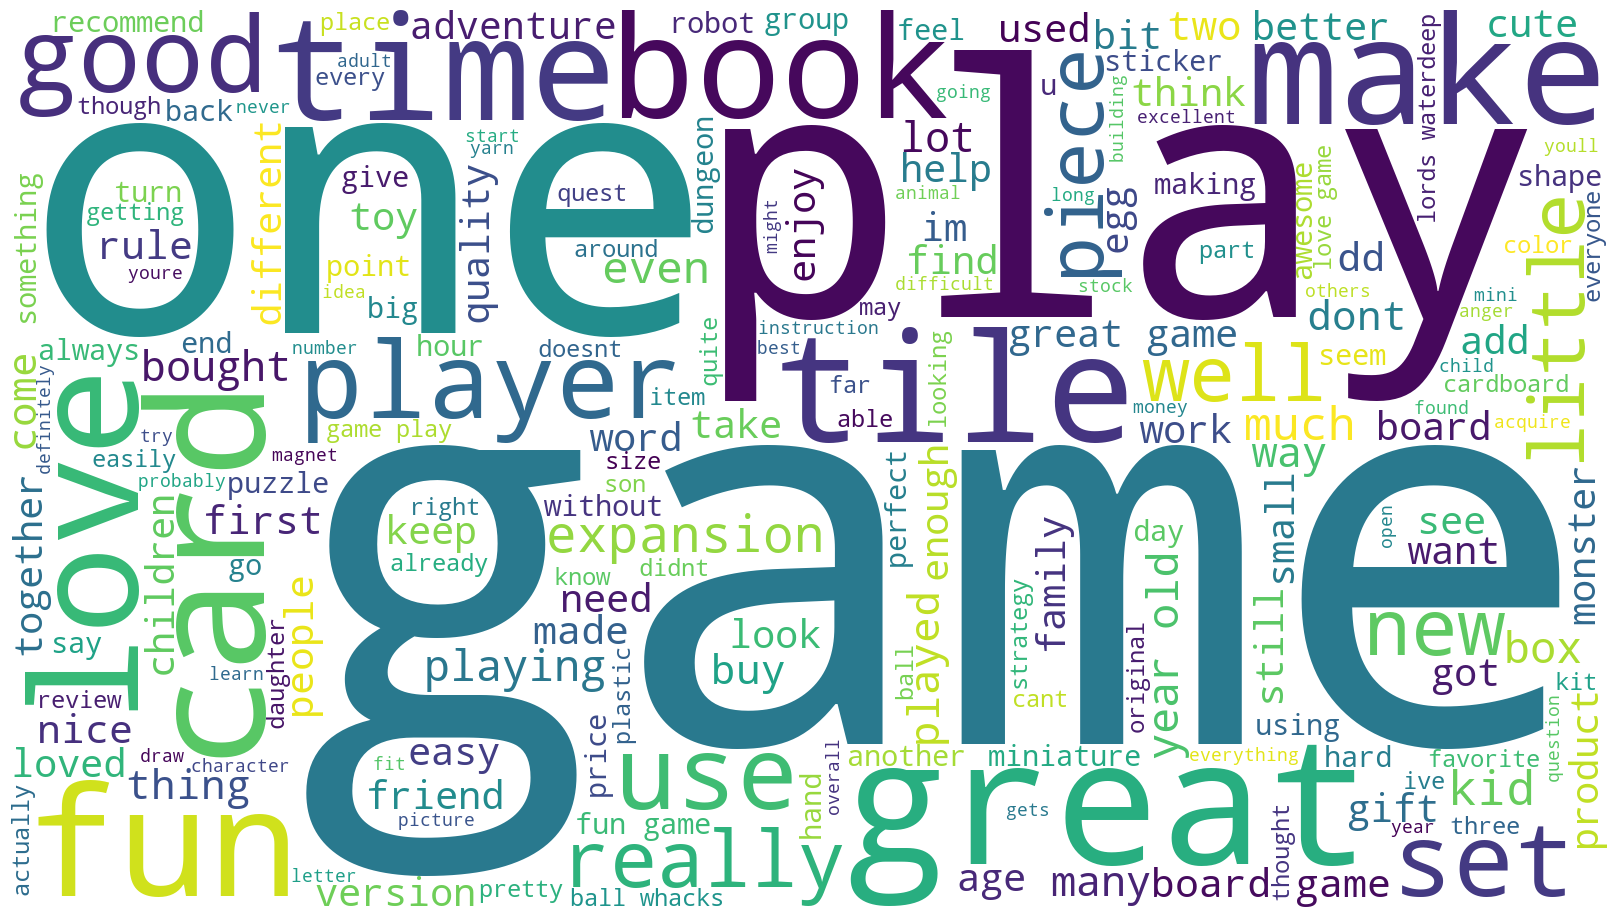

In [256]:
# Create a wordcloud without stop words.
wordcloud1 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(rev_tokens_string) 

# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis('off') 
plt.tight_layout(pad = 0) 


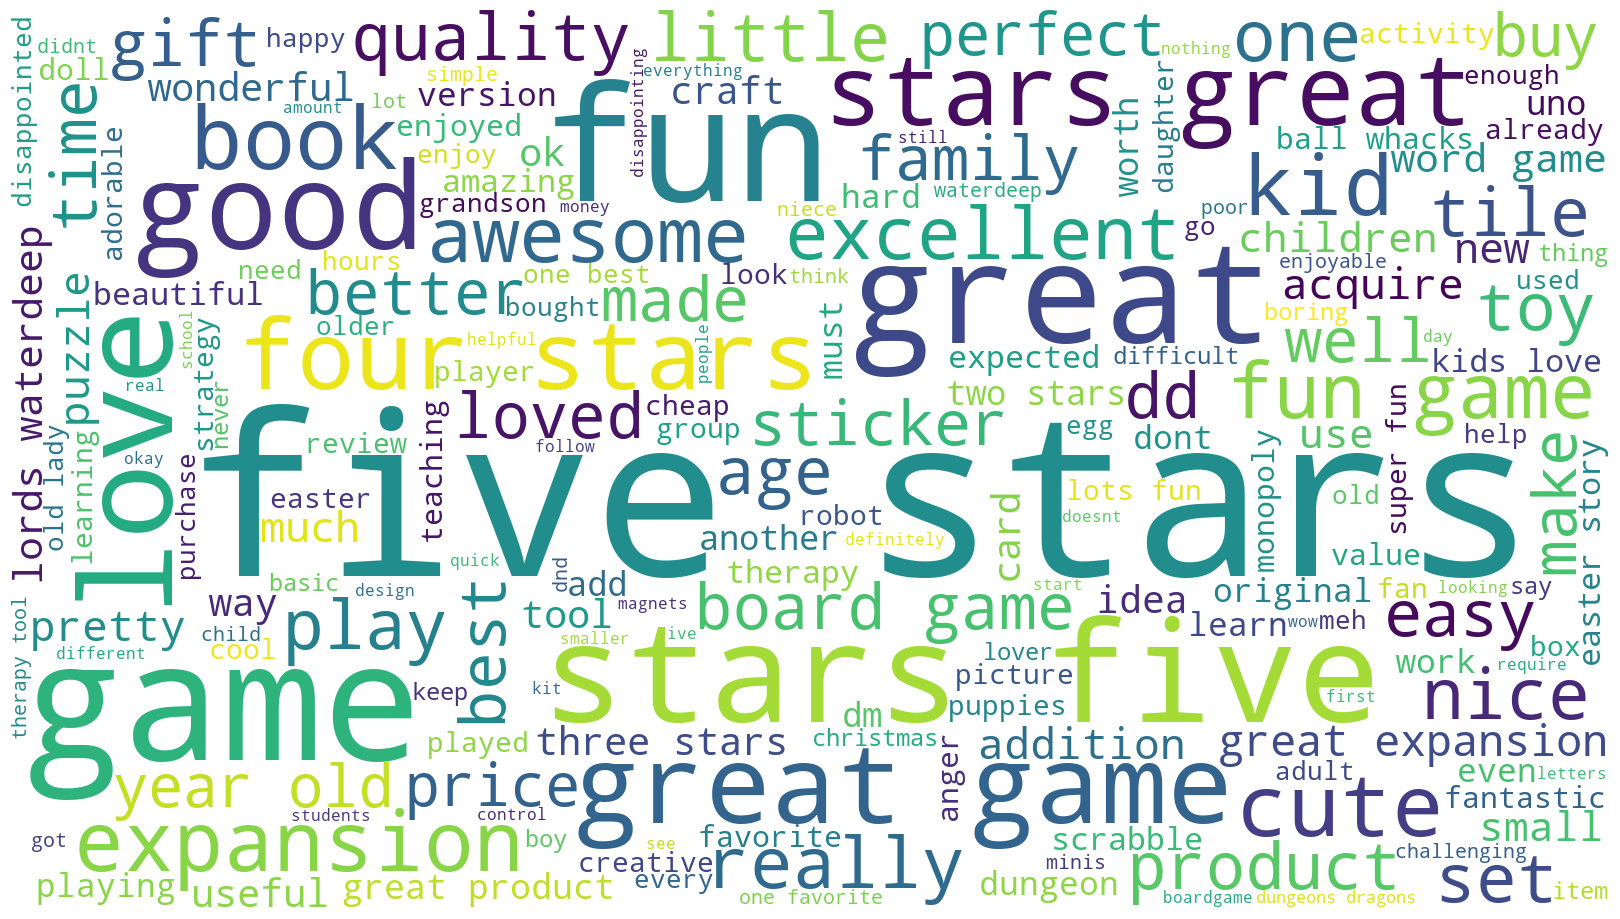

In [257]:
# Create a wordcloud without stop words.
wordcloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='viridis', 
                min_font_size = 10).generate(sum_tokens_string) 

# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 


In [258]:
# View the frequency distribution.
fdist_review2 = FreqDist(rev_tokens)

# Preview the data.
fdist_review2

FreqDist({'game': 1685, 'great': 596, 'fun': 553, 'one': 530, 'play': 502, 'like': 414, 'love': 331, 'really': 319, 'get': 319, 'cards': 301, ...})

In [259]:
# View the frequency distribution.
fdist_summary2 = FreqDist(sum_tokens)

# Preview the data.
fdist_summary2

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

### 4d) Identify 15 most common words

In [260]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter.
rev_counts = pd.DataFrame(Counter(rev_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rev_counts

,Frequency
Word,
game,1685
great,596
fun,553
one,530
play,502
like,414
love,331
really,319
get,319


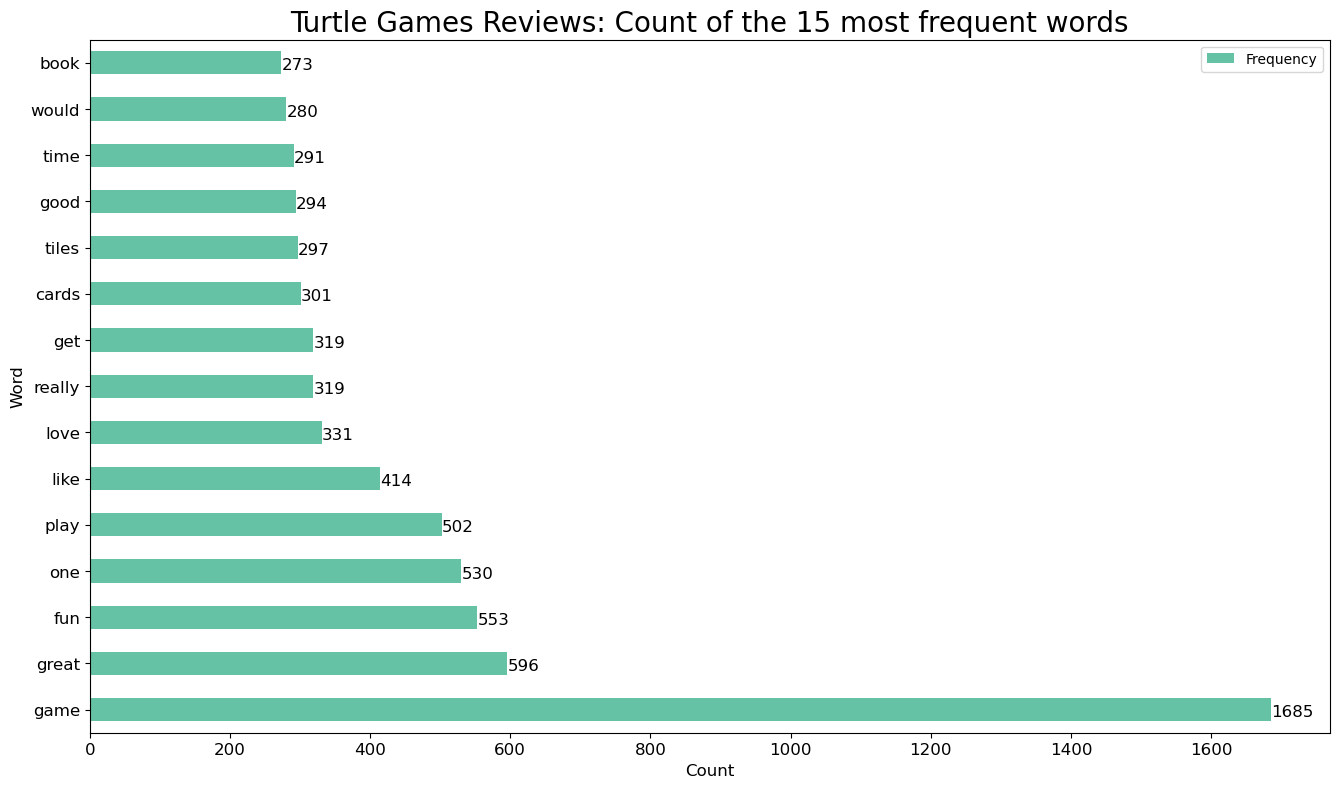

In [261]:
# Set the plot type.
ax = rev_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='Set2')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games Reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='k')

In [262]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter.
sum_counts = pd.DataFrame(Counter(sum_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sum_counts

,Frequency
Word,
stars,466
five,381
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


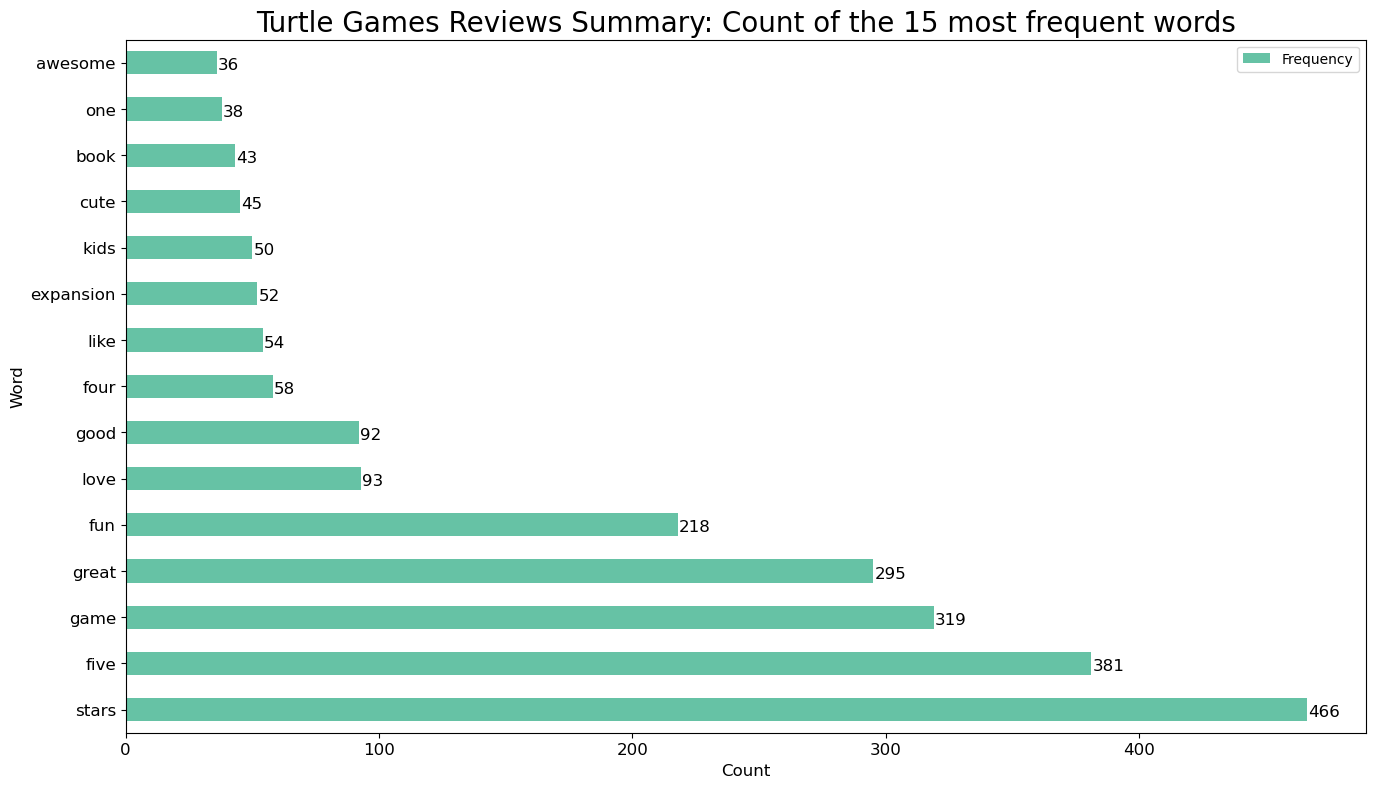

In [263]:
# Set the plot type.
ax = sum_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='Set2')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle Games Reviews Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='k')

- Most frequent words used in both full and summary reviews contains a positive sentiment. Therefore we can say that Turtle games customers has a positive sentimen t towards Turtle Games products.

## 5. Review Polarity Scores Using TextBlop

In [264]:
# Provided function for polarity.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [265]:
# Determine polarity of both columns. 
df4['rev_polarity'] = df4['review'].apply(generate_polarity)
df4['sum_polarity'] = df4['summary'].apply(generate_polarity)
# View output.
df4.head()

,review,summary,review_tokens,summary_tokens,rev_polarity,sum_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


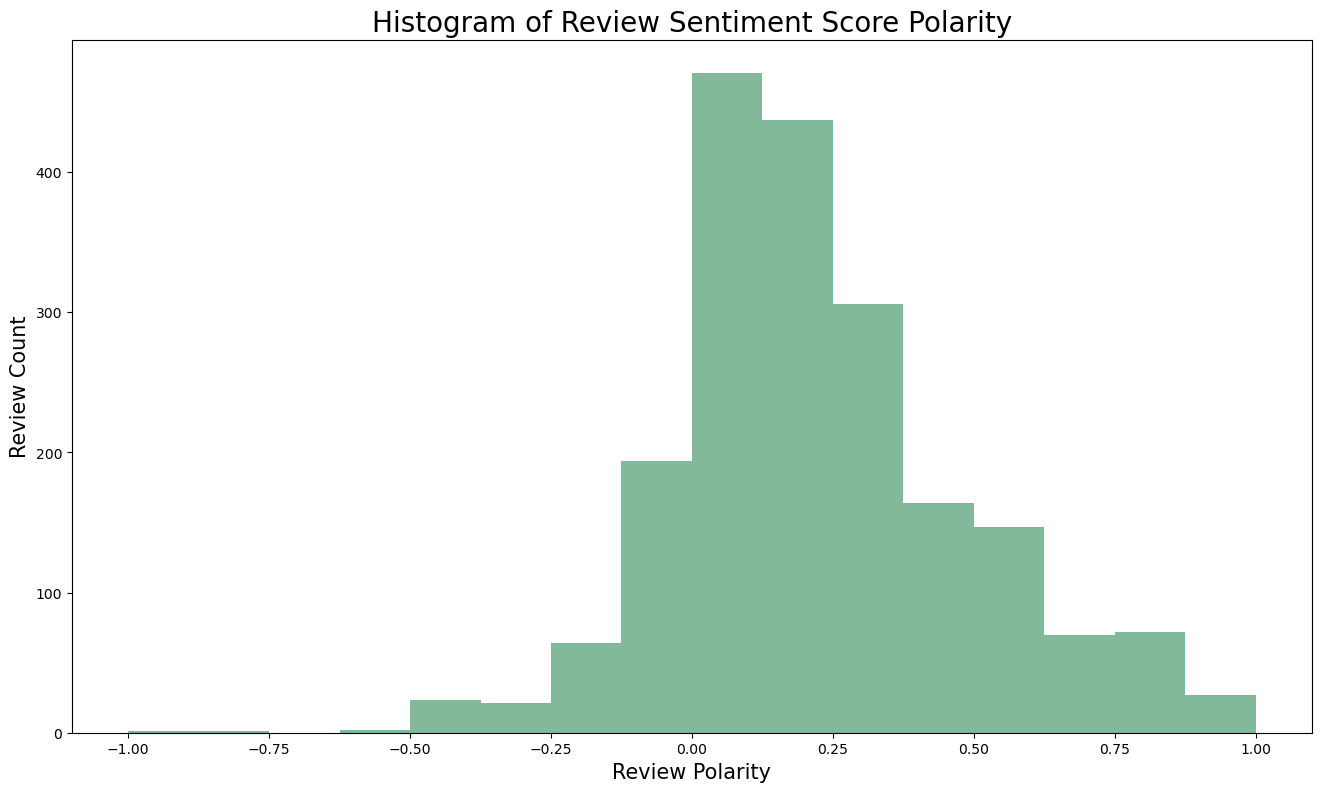

In [266]:
# Review:
# Histogram of polarity
# Set the number of bins.
num_bins = 16

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['rev_polarity'], num_bins, alpha=0.6,facecolor='SeaGreen')

# Set the labels.
plt.xlabel('Review Polarity', fontsize=15)
plt.ylabel('Review Count', fontsize=15)
plt.title('Histogram of Review Sentiment Score Polarity', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Histogram of sentiment score
plt.show()


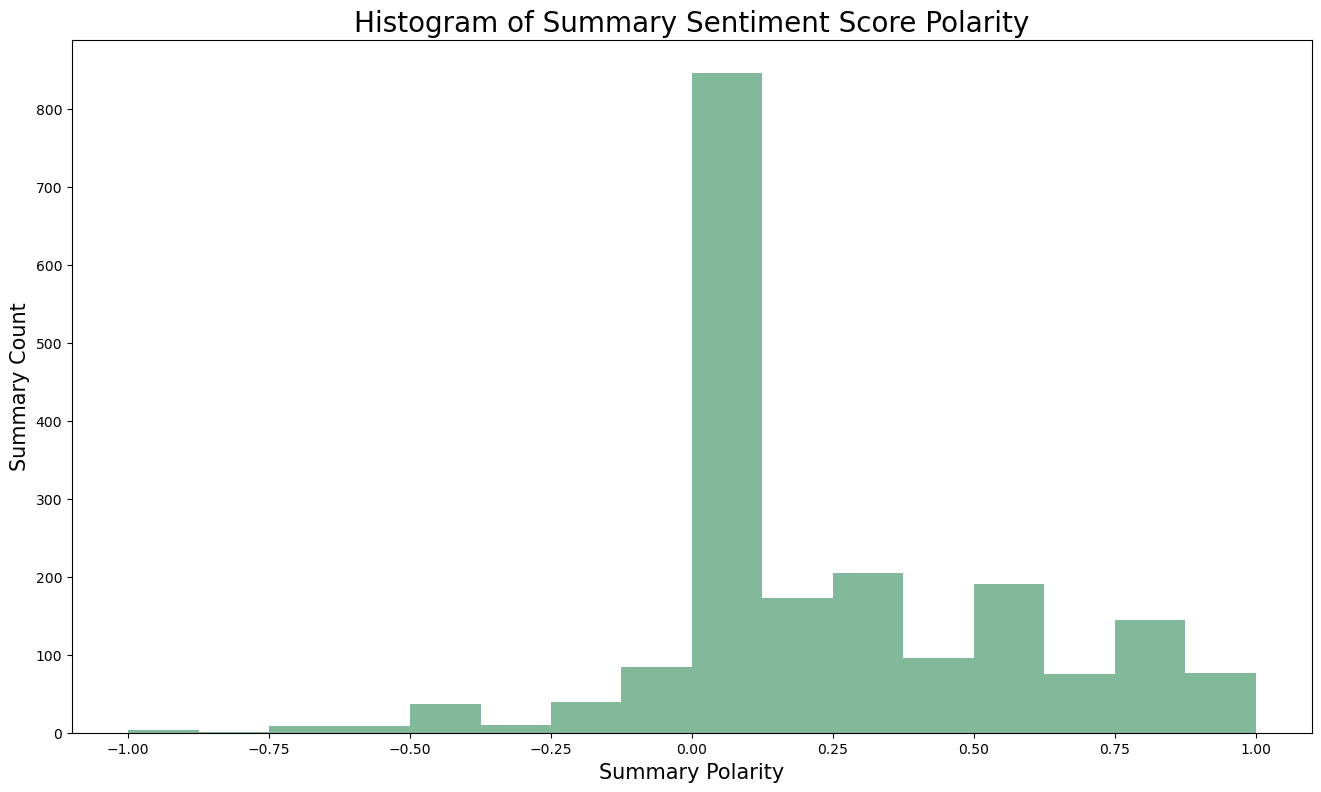

In [267]:
# Summary:
# Histogram of polarity
# Set the number of bins.
num_bins = 16

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['sum_polarity'], num_bins, alpha=0.6,facecolor='SeaGreen')

# Set the labels.
plt.xlabel('Summary Polarity', fontsize=15)
plt.ylabel('Summary Count', fontsize=15)
plt.title('Histogram of Summary Sentiment Score Polarity', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Histogram of sentiment score
plt.show()

## 6. Review Subjectivity Scores Using TextBlop

In [268]:
# Provided function for Subjectivity.
def generate_subjectivity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [269]:
# Determine polarity of both columns. 
df4['rev_subjectivity'] = df4['review'].apply(generate_subjectivity)
df4['sum_subjectivity'] = df4['summary'].apply(generate_subjectivity)
# View output.
df4.head()

,review,summary,review_tokens,summary_tokens,rev_polarity,sum_polarity,rev_subjectivity,sum_subjectivity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15,0.486111,0.500000
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80,0.442976,0.900000
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00,0.430435,0.733333
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00,0.784848,0.000000
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00,0.316667,0.000000


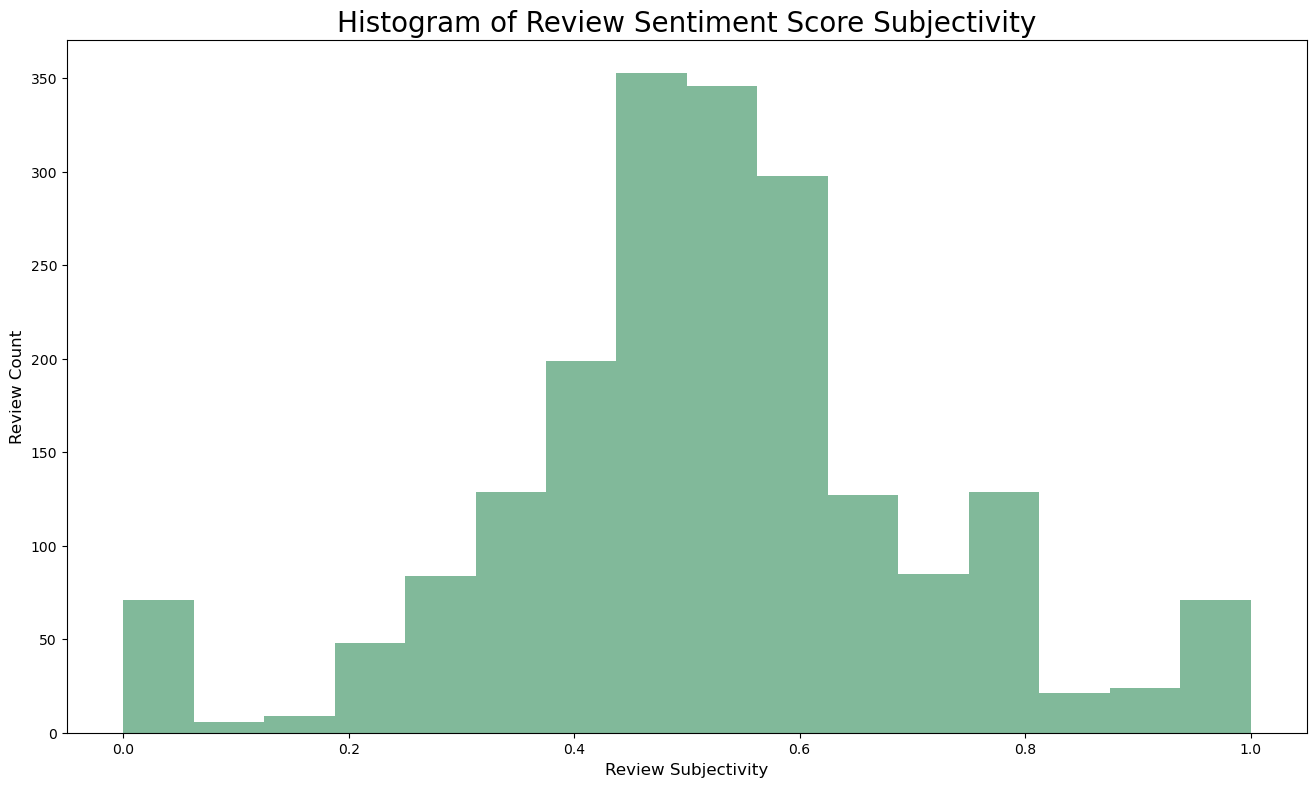

In [270]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 16

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['rev_subjectivity'], num_bins, alpha=0.6,facecolor='SeaGreen')

# Set the labels.
plt.xlabel('Review Subjectivity', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.title('Histogram of Review Sentiment Score Subjectivity', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Histogram of sentiment score
plt.show()


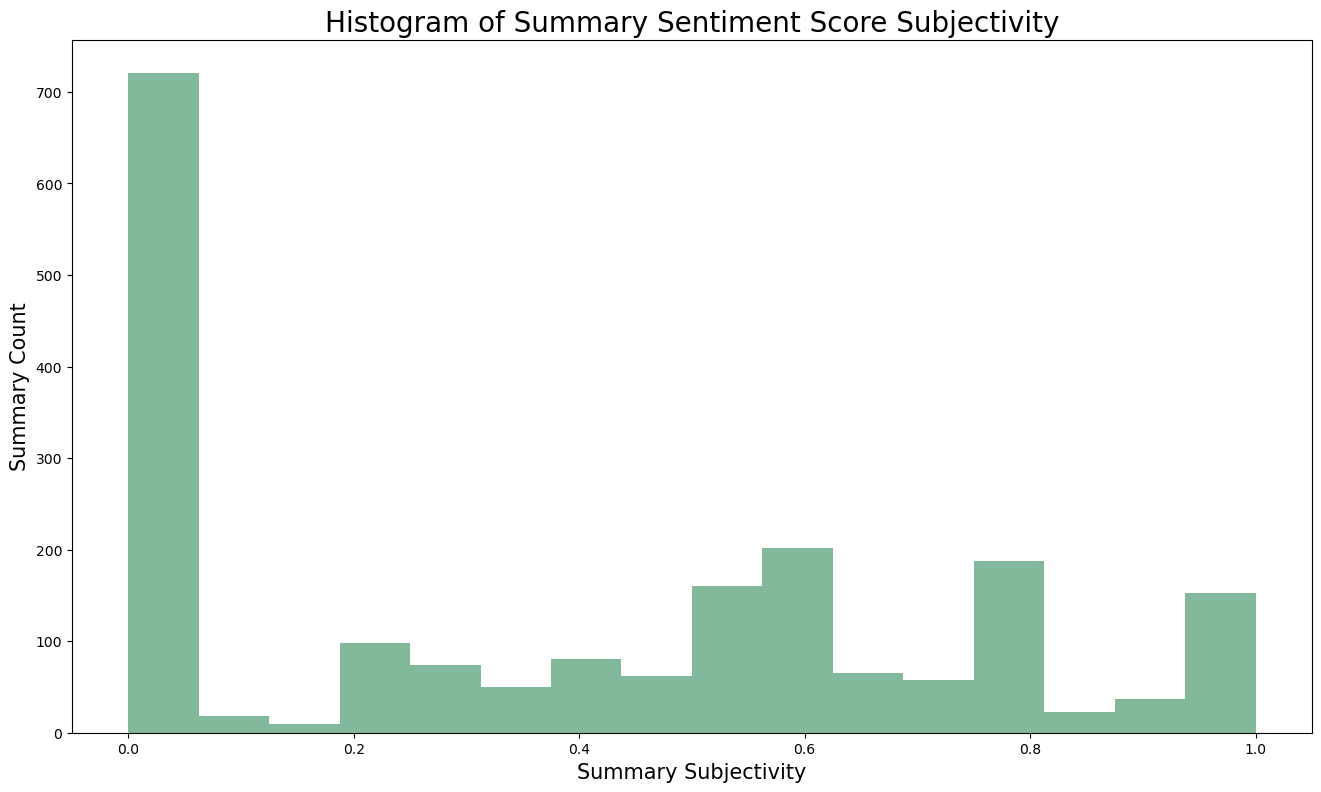

In [271]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 16

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['sum_subjectivity'], num_bins, alpha=0.6,facecolor='SeaGreen')

# Set the labels.
plt.xlabel('Summary Subjectivity', fontsize=15)
plt.ylabel('Summary Count', fontsize=15)
plt.title('Histogram of Summary Sentiment Score Subjectivity', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Histogram of sentiment score
plt.show()

## 6. Top 20 negative reviews and summaries 

In [272]:
# Top 20 negative reviews.
negative_reviews = df4.nsmallest(20,'rev_polarity')
negative_reviews = negative_reviews[['review', 'summary', 'rev_polarity', 'rev_subjectivity']]

# View output.
negative_reviews.style.set_properties(subset=['review'],**{'width':'1000px'})

,review,summary,rev_polarity,rev_subjectivity
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,-1.000000,1.000000
182,incomplete kit very disappointing,incomplete kit,-0.780000,0.910000
1804,im sorry i just find this product to be boring and to be frank juvenile,disappointing,-0.583333,0.750000
364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,anger control game,-0.550000,0.300000
117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,stickers,-0.500000,0.900000
227,this was a gift for my daughter i found it difficult to use,two stars,-0.500000,1.000000
230,i found the directions difficult,three stars,-0.500000,1.000000
290,instructions are complicated to follow,two stars,-0.500000,1.000000
301,difficult,three stars,-0.500000,1.000000
1524,expensive for what you get,two stars,-0.500000,0.700000


In [273]:
# Top 20 negative summaries.

negative_summaries = df4.nsmallest(20,'sum_polarity')

negative_summaries = negative_summaries[['review', 'summary', 'rev_polarity', 'rev_subjectivity']]

# View output.
negative_summaries.style.set_properties(subset=['review'],**{'width':'1000px'})

,review,summary,rev_polarity,rev_subjectivity
21,these are cute tatoos for those who love pirates however the retail price is 150 and amazons price is more than double i have never paid over the retail price for an item at amazon i was shocked there are only a handful of tatoos and for 150 i wouldnt mind but to charge 350 for an item that sells anywhere else for 150 is criminal find it at a local drugstore and save your,the worst value ive ever seen,0.050000,0.556250
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,boring unless you are a craft person which i am,-1.000000,1.000000
829,ive discovered that im really new school when it comes to my board games except for boggle and a couple chess boards and a novelty version of yahtzee this is the oldest game i own by more than 30 years its very watered down for my usual tastes gameplay consists of playing tiles on a board to start expand or merge hotel chains then you buy stocks trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game the player with the most money at the end wins i think this game is certainly better with more people it can accommodate up to 6 and that may be too many ive never played with that number but with 3 or fewer it is too easy to run away with the game more players offers more competition and gaps between your turns and dilutes the available stock with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big payout ive enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isnt it this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game,boring,0.156399,0.469546
1166,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items this helps open up story ideas and plot hooks,before this i hated running any rpg campaign dealing with towns because it,-0.133333,0.733333
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,another worthless dungeon masters screen from galeforce9,0.035952,0.442976
144,my kids grew up with a peg bench and hammer and loved it but i bought this brand for my grandson and was disappointed the pegs fit too loosely into the bench and he does not even use his hammer to pound them in as he can just push them in with his hand or sometimes they fall through automatically my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination etc when pounding them in the pegs are nice and thick for little hands but just not snug enough fitting to really use the toy as it is intended,disappointed,0.108173,0.524519
631,eggs split and were unusable,disappointed,0.000000,0.000000
793,my mom already owned an acquire game but she always commented on how poorly it was made so i thought i would get her a new one for christmas the quality of this one was not much better her old one had cards for each playe

(-0.5, 799.5, 399.5, -0.5)

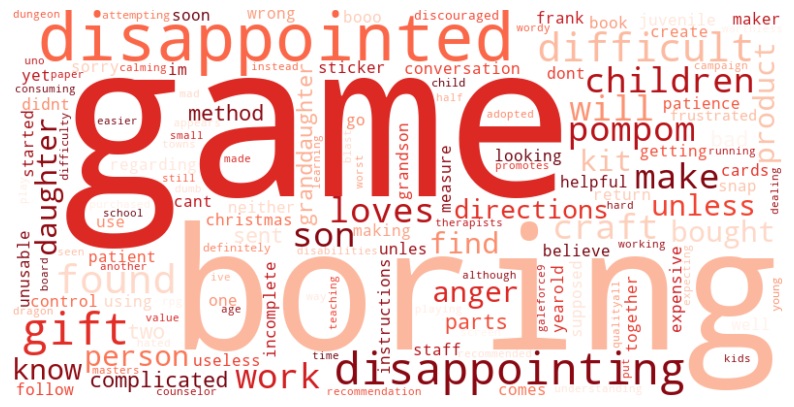

In [288]:
# Negative reviews in a wordcloud
text_summary = ' '.join(negative_summaries['summary'])
text_review = ' '.join(negative_reviews['review'])
negatve_text = text_review+' '+text_summary

# Create a wordclod
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,
                colormap='Reds_r',
                background_color='white').generate(negatve_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

## Top 20 Positive Reviews and Summaries

In [275]:
# Top 20 positive reviews.
positive_reviews = df4.nlargest(20,'rev_polarity')
positive_reviews = positive_reviews[['review', 'summary', 'rev_polarity', 'rev_subjectivity']]
# View output.
positive_reviews.style.set_properties(subset=['review'],**{'width':'500px'})

,review,summary,rev_polarity,rev_subjectivity
7,came in perfect condition,five stars,1.000000,1.000000
165,awesome book,five stars,1.000000,1.000000
194,awesome gift,five stars,1.000000,1.000000
496,excellent activity for teaching selfmanagement skills,five stars,1.000000,1.000000
524,perfect just what i ordered,five stars,1.000000,1.000000
591,wonderful product,five stars,1.000000,1.000000
609,delightful product,five stars,1.000000,1.000000
621,wonderful for my grandson to learn the resurrection story,five stars,1.000000,1.000000
790,perfect,aquire game,1.000000,1.000000
933,awesome,five stars,1.000000,1.000000


In [276]:
# Top 20 positive summaries.
positive_summaries = df4.nlargest(20,'sum_polarity')
positive_summaries = positive_summaries[['review', 'summary', 'rev_polarity', 'rev_subjectivity']]


# View output.
positive_summaries.style.set_properties(subset=['review'],**{'width':'1000px'})

,review,summary,rev_polarity,rev_subjectivity
6,i have bought many gm screens over the years but this one is the best i have ever seen it has all the relevant information i need and no crap filler on it very happy with this screen,best gm screen ever,0.660000,0.700000
28,these are intricate designs for older children and adults this book is full of beautiful designs just waiting to be awakened by your choice of colors great for creativity,wonderful designs,0.541667,0.658333
32,awesome my 8 year olds favorite xmas gift its 915 am xmas morning and hes already colored three of these,perfect,0.750000,1.000000
80,my daughter loves these little books theyre the perfect size to keep in the car or a diaper bag or purse i keep them on hand for times when were stuck waiting in a doctors office or anywhere else,theyre the perfect size to keep in the car or a diaper,0.406250,0.750000
134,this occupied my almost3 year old for nearly an hour stickers were durable and easy to peel afterwards he kept going back to the box to see if there were more robot stickers to assemble in there ill probably drop another dollar and buy it again for his christmas stocking three cheers for the short memory of a preschooler,perfect for preschooler,0.090476,0.461905
140,i bought 8 of these for my 3 year old daughters robot themed birthday party as favors for the little ones and it was a great hit i didnt realize that the stickers were robot parts that the kids assemble themselves to create their own robots that was a lot of fun and for the price it was well worth it,awesome sticker activity for the price,0.318750,0.458333
161,my 8 year old son loves this drawing book loves it,awesome book,0.100000,0.200000
163,this was a christmas present for a nephew who loves to draw and he loves superheroes he was very happy with his gift,he was very happy with his gift,0.500000,0.500000
187,great product took a little practice and time but after you get the hang of it it turns into a cute cuddly little friend mine didnt turn out exactly like the picture but it adds a taste of your own sense of style they are super cute and comes with everything it says it will,awesome,0.326042,0.708333
210,i was skeptical but my 9 year old has had so much fun with this kit and it was her favorite christmas present she pretty much made the puppies herself with minimal help from me though i did hot glue some ears rather than use the included glue only downside is the cuttings can be messy but really wonderful instructions wellmade supplies and can be used for many yearsand maybe even making different animals if you are creative highly recommend for artsy determined 9 year olds i actually want to try to make one myself they are so darn cute,awesome and welldesigned for 9 year olds,0.192222,0.593889


## 7 Sentiment Analysis using vaderSentiment

In [277]:
# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [278]:
df5 = df4[['review', 'summary']]

# View DataFrame.
df5.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [279]:
# Apply sentiment analysis as new columns to df5
df5['rev_compound'] = [sia.polarity_scores(review)['compound'] for review in df5['review']]
df5['rev_neg'] = [sia.polarity_scores(review)['neg'] for review in df5['review']]
df5['rev_neu'] = [sia.polarity_scores(review)['neu'] for review in df5['review']]
df5['rev_pos'] = [sia.polarity_scores(review)['pos'] for review in df5['review']]

df5.head()

,review,summary,rev_compound,rev_neg,rev_neu,rev_pos
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.6333,0.103,0.841,0.056
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,0.9404,0.097,0.705,0.198
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,-0.8334,0.143,0.724,0.134
3,amazing buy bought it as a gift for our new dm...,five stars,0.8860,0.000,0.514,0.486
4,as my review of gf9s previous screens these we...,money trap,-0.6808,0.196,0.804,0.000


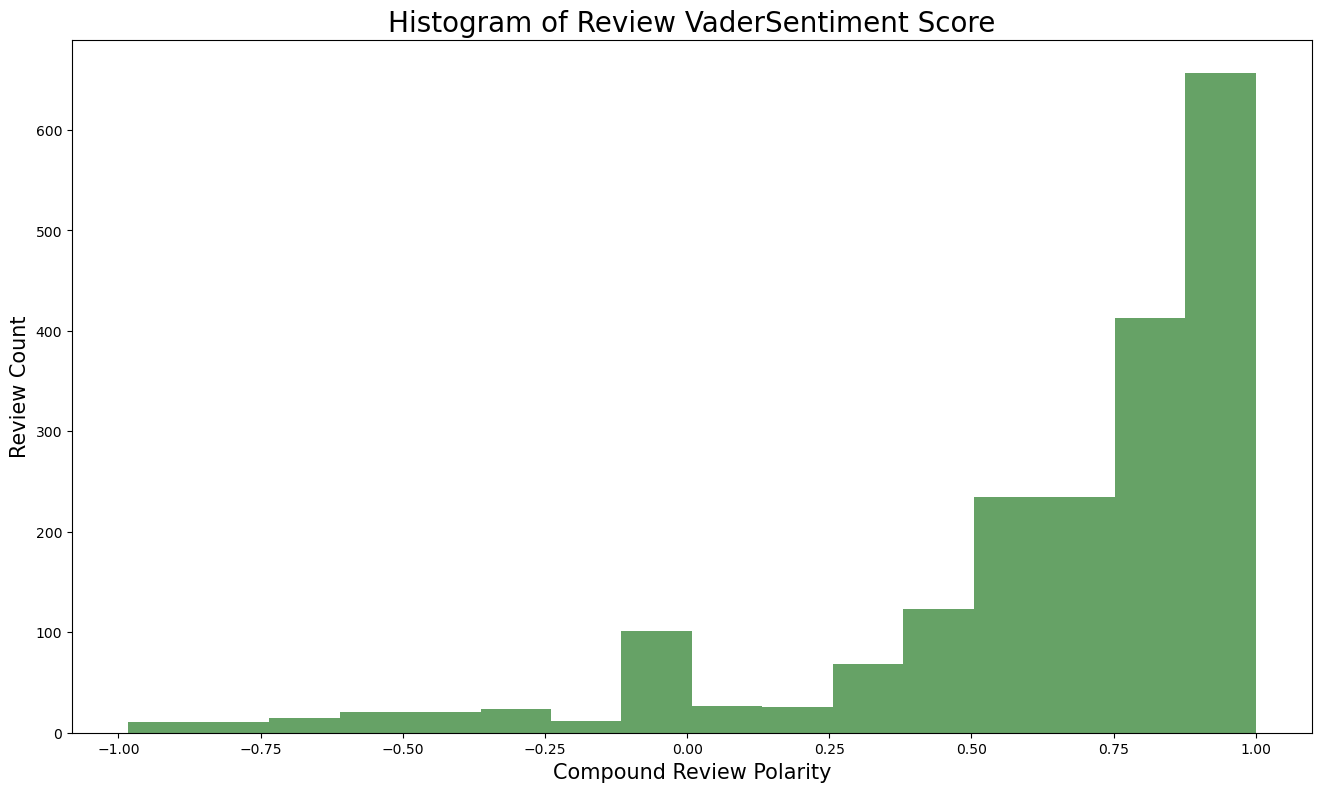

In [280]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 16

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['rev_compound'], num_bins, alpha=0.6,facecolor='DarkGreen')

# Set the labels.
plt.xlabel('Compound Review Polarity', fontsize=15)
plt.ylabel('Review Count', fontsize=15)
plt.title('Histogram of Review VaderSentiment Score', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Histogram of sentiment score
plt.show()

In [281]:
# Apply sentiment analysis as new columns to df5
df5['sum_compound']= [sia.polarity_scores(summary)['compound'] for summary in df5['summary']]
df5['sum_neg'] = [sia.polarity_scores(summary)['neg'] for summary in df5['summary']]
df5['sum_neu'] = [sia.polarity_scores(summary)['neu'] for summary in df5['summary']]
df5['sum_pos'] = [sia.polarity_scores(summary)['pos'] for summary in df5['summary']]

df5[['summary','sum_compound','sum_neg','sum_neu','sum_pos']].head()

,summary,sum_compound,sum_neg,sum_neu,sum_pos
0,the fact that 50 of this space is wasted on ar...,-0.0711,0.145,0.723,0.132
1,another worthless dungeon masters screen from ...,-0.4404,0.326,0.674,0.000
2,pretty but also pretty useless,0.4019,0.306,0.165,0.529
3,five stars,0.0000,0.000,1.000,0.000
4,money trap,-0.3182,0.697,0.303,0.000


- five stars, four star actually all star ratings in summary reviews got neutral scores which is absolutely misleading. 
- However this is correctly reflecting in reviews therefore analysis will continue only based on reviews

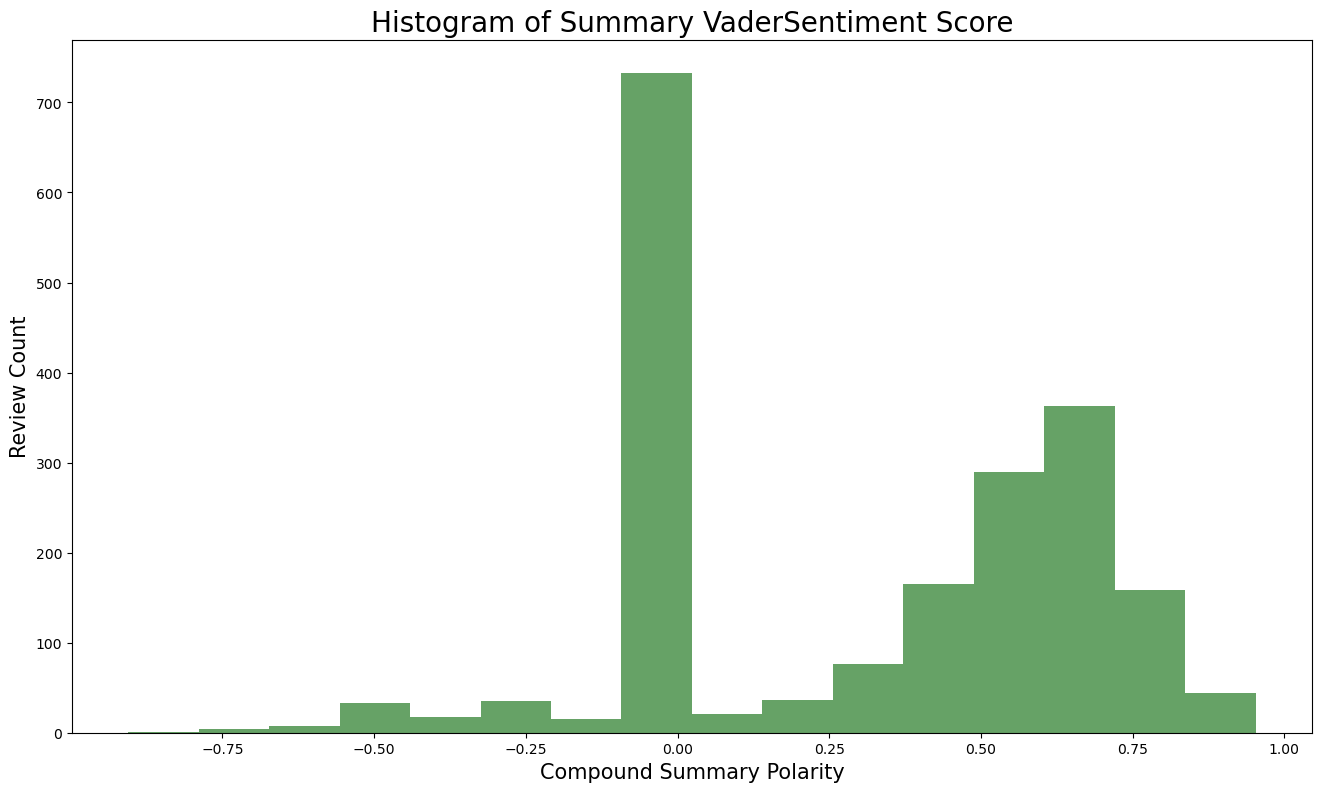

In [282]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 16

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df5['sum_compound'], num_bins, alpha=0.6,facecolor='DarkGreen')

# Set the labels.
plt.xlabel('Compound Summary Polarity', fontsize=15)
plt.ylabel('Review Count', fontsize=15)
plt.title('Histogram of Summary VaderSentiment Score', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Histogram of sentiment score
plt.show()

## 7. Discuss: Insights and observations

- both TextBlop and VaderSentiment depicts a positive sentimet.
- However reviews like 'five stars' 'four stars' was given neutral scores. Therefore further NLP analysis conducted below.

In [283]:
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
